This is a project i did for a kaggle competition: 
[Kaggele Comp](https://www.kaggle.com/competitions/playground-series-s4e2/overview)

cite: @misc{playground-series-s4e2,
    author = {Walter Reade, Ashley Chow},
    title = {Multi-Class Prediction of Obesity Risk},
    publisher = {Kaggle},
    year = {2024},
    url = {https://kaggle.com/competitions/playground-series-s4e2}
}

In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Loading the Data set from a csv file to a pandas data frame


In [7]:
df = pd.read_csv('train.csv')

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [13]:
df = df.rename(columns={'FAVC': 'Frequent consumption of high caloric food ',
                       'FCVC': 'Frequency of consumption of vegetables',
                       'NCP': 'Number of main meals per day',
                       'CAEC': 'Consumption of food between meals',
                       'CH2O': 'Daily water consumption in liters',  
                       'SCC': 'Calories consumption monitoring',
                       'FAF': 'Physical activity frequency',
                       'TUE': 'Time using technology devices',
                       'CALC': 'Consumption of alcohol',
                       'MTRANS': 'Main transportation mode'})

In [15]:
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  Frequent consumption of high caloric food   \
0                                        yes   
1                                        yes   
2                                        yes   
3                                        yes   
4                                        yes   

   Frequency of consumption of vegetables  Number of main meals per day  \
0                                2.000000                      2.983297   
1                                2.000000                      3.000000   
2                                1.880534                      1.411685   
3                                3.000000                      3.000000   
4                                2.679664                      1.971472   

  Consumption of food between meals SMOKE  Daily water consumption in liters  \
0                         Sometimes    no                           2.763573   
1                        Frequently    no                           2.000000   
2                         Sometimes    no                           1.910378   
3                         Sometimes    no                           1.674061   
4                         Sometimes    no                           1.979848   

  Calories consumption monitoring  Physical activity frequency  \
0                              no                     0.000000   
1                              no                     1.000000   
2                              no                     0.866045   
3                              no                     1.467863   
4                              no                     1.967973   

   Time using technology devices Consumption of alcohol  \
0                       0.976473              Sometimes   
1                       1.000000                     no   
2                       1.673584                     no   
3                       0.780199              Sometimes   
4                       0.931721              Sometimes   

  Main transportation mode           NObeyesdad  
0    Public_Transportation  Overweight_Level_II  
1               Automobile        Normal_Weight  
2    Public_Transportation  Insufficient_Weight  
3    Public_Transportation     Obesity_Type_III  
4    Public_Transportation  Overweight_Level_II

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


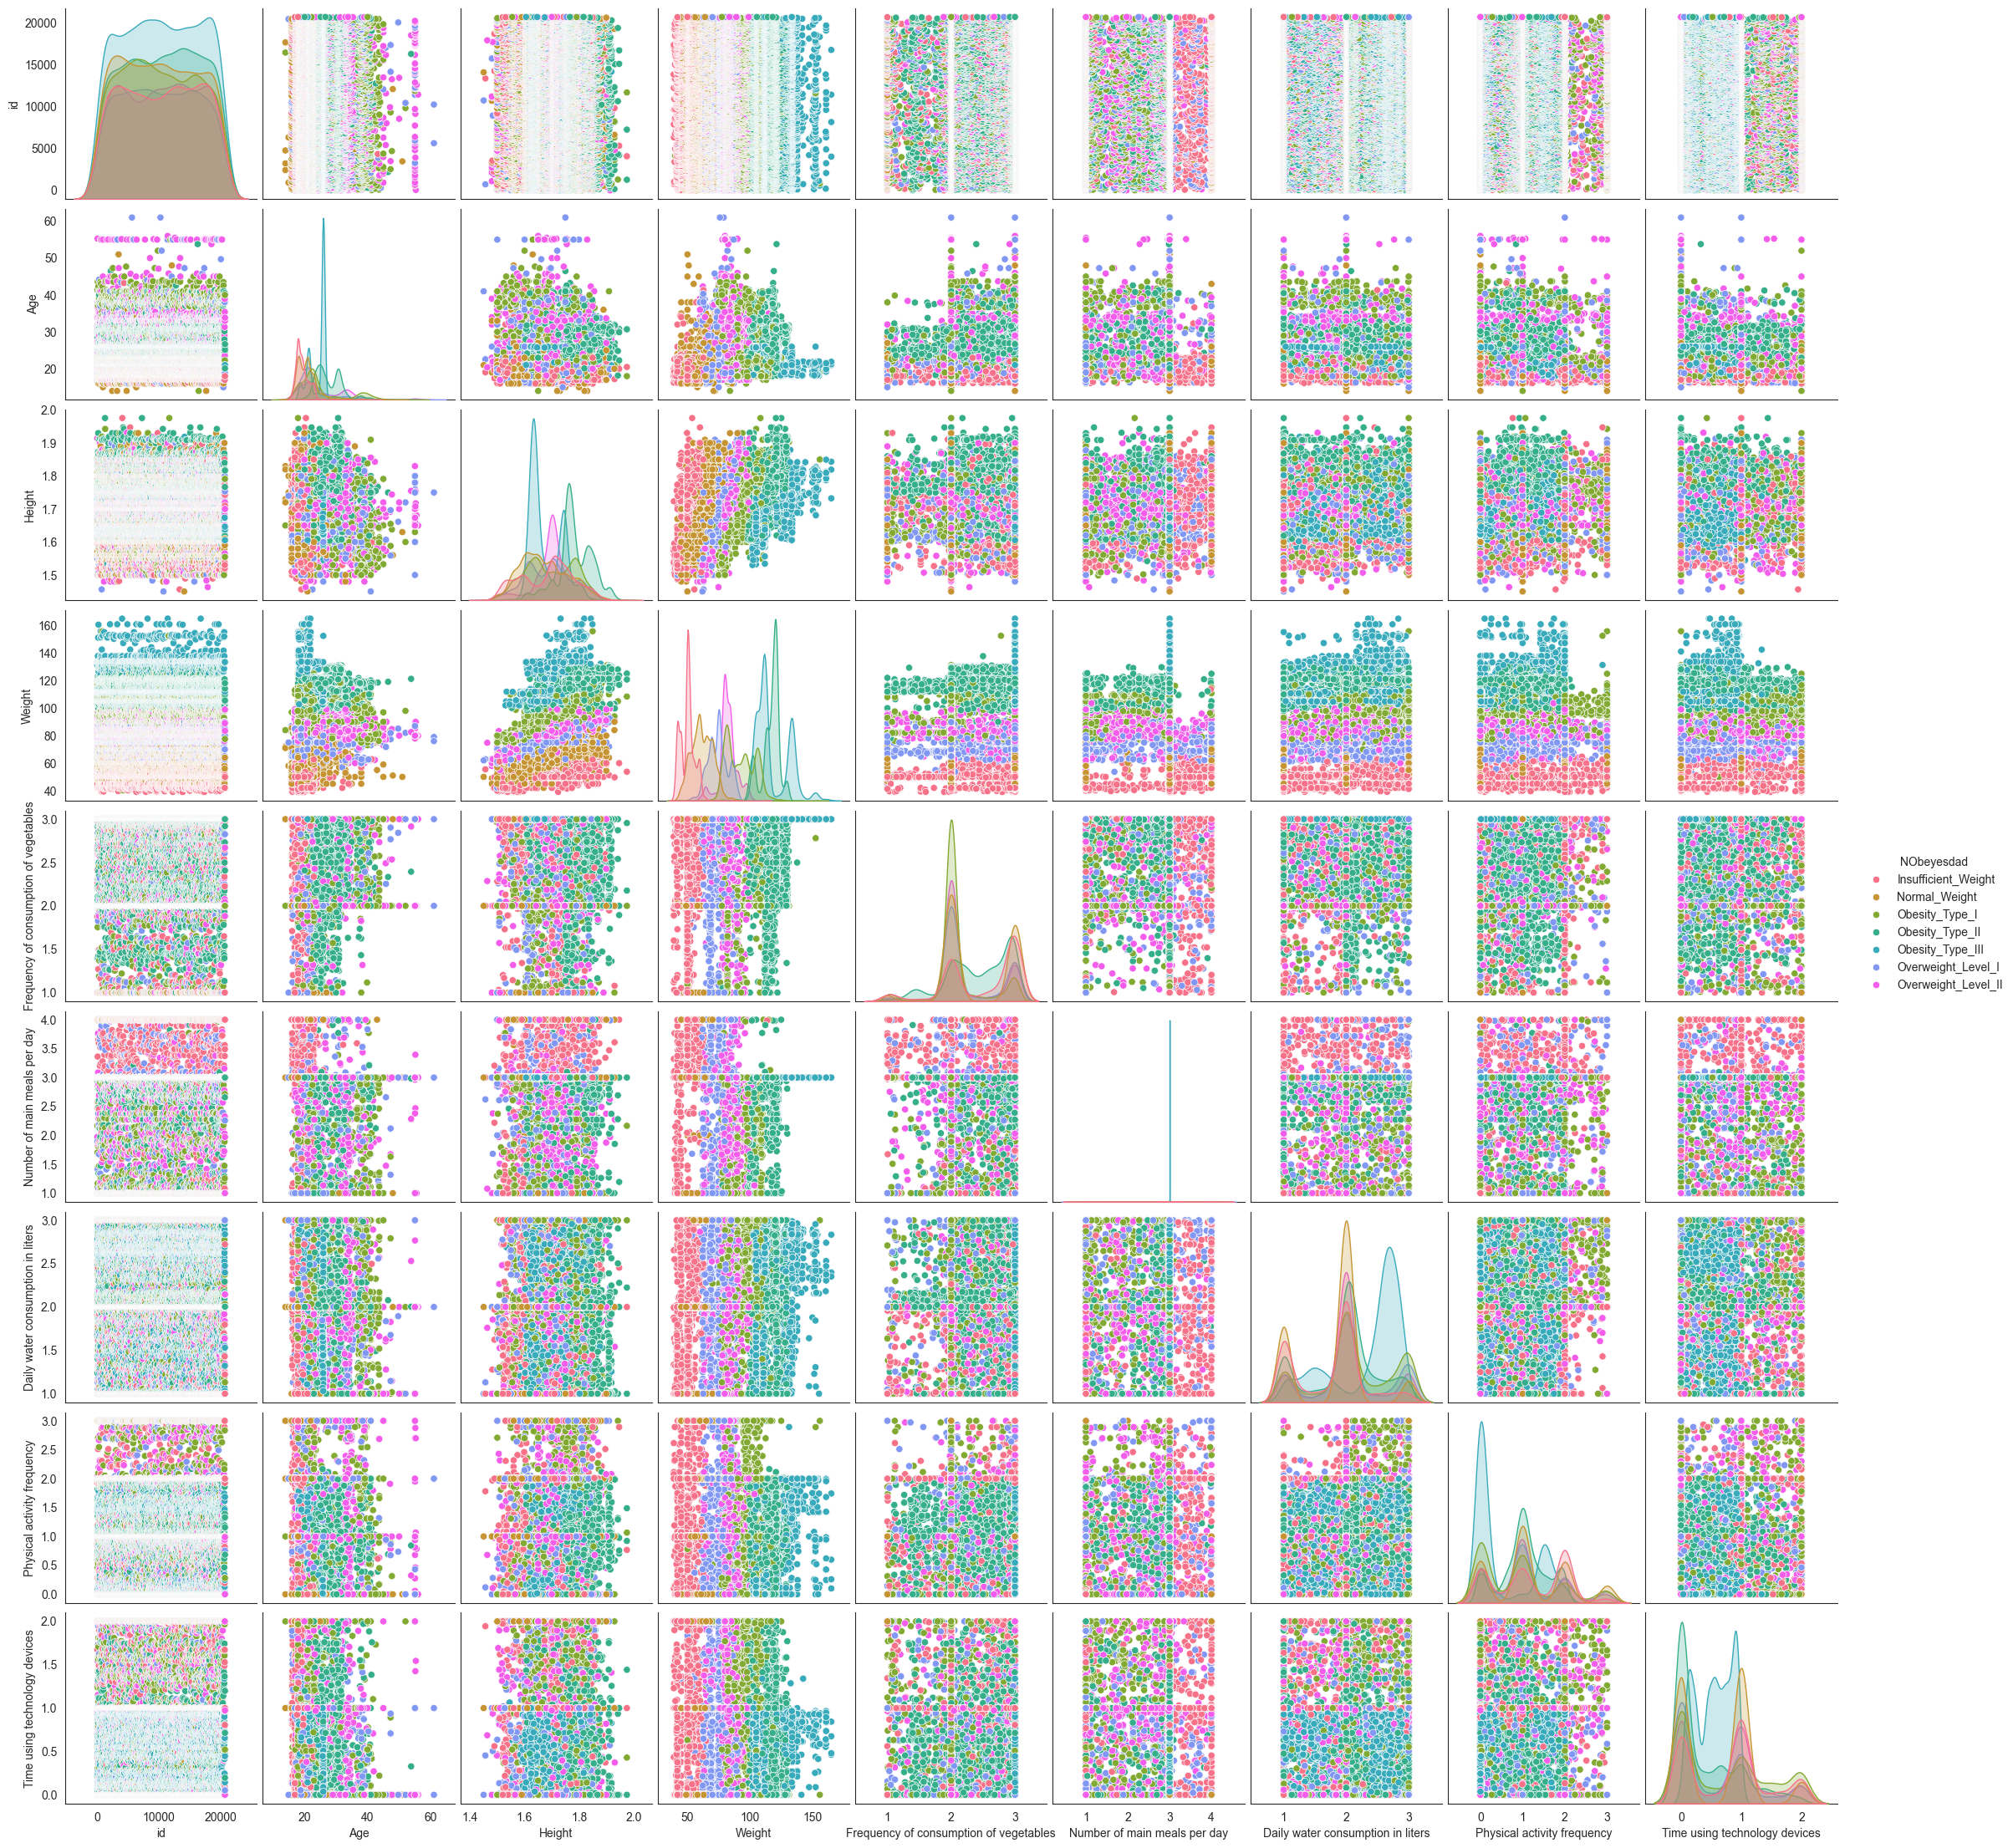

In [16]:
sns.set_palette("Spectral")
sns.set_style("white")
#viewing and converting Species collumn to categorical 
df['NObeyesdad'].dtype
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'])

# Visualize the relationship between each pair of numerical variables
sns.pairplot(data=df, hue='NObeyesdad')

In [17]:
# Calculating the mean for each feature by species.
df.groupby('NObeyesdad').mean(numeric_only = True)

/var/folders/65/x3fzstlj3zv3hd94d22n1f240000gn/T/ipykernel_41204/2188938612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('NObeyesdad').mean(numeric_only = True)


id        Age    Height      Weight  \
NObeyesdad                                                           
Insufficient_Weight  10388.804598  19.336502  1.683693   49.860773   
Normal_Weight        10136.834523  20.801388  1.670744   61.533289   
Obesity_Type_I       10170.039519  25.023615  1.693509   92.371026   
Obesity_Type_II      10614.992303  27.707128  1.782715  115.995914   
Obesity_Type_III     10507.706871  24.126847  1.676007  117.697452   
Overweight_Level_I   10271.952204  23.045197  1.686880   74.228266   
Overweight_Level_II  10494.728390  26.032084  1.706163   82.085513   

                     Frequency of consumption of vegetables  \
NObeyesdad                                                    
Insufficient_Weight                                2.479756   
Normal_Weight                                      2.372249   
Obesity_Type_I                                     2.097052   
Obesity_Type_II                                    2.425227   
Obesity_Type_III                                   3.000000   
Overweight_Level_I                                 2.256583   
Overweight_Level_II                                2.224499   

                     Number of main meals per day  \
NObeyesdad                                          
Insufficient_Weight                      2.919554   
Normal_Weight                            2.889552   
Obesity_Type_I                           2.454551   
Obesity_Type_II                          2.798439   
Obesity_Type_III                         2.999950   
Overweight_Level_I                       2.528178   
Overweight_Level_II                      2.594109   

                     Daily water consumption in liters  \
NObeyesdad                                               
Insufficient_Weight                           1.744163   
Normal_Weight                                 1.806204   
Obesity_Type_I                                2.129783   
Obesity_Type_II                               1.985064   
Obesity_Type_III                              2.332338   
Overweight_Level_I                            2.069366   
Overweight_Level_II                           2.004470   

                     Physical activity frequency  \
NObeyesdad                                         
Insufficient_Weight                     1.201782   
Normal_Weight                           1.189580   
Obesity_Type_I                          0.922710   
Obesity_Type_II                         1.029579   
Obesity_Type_III                        0.549225   
Overweight_Level_I                      1.134657   
Overweight_Level_II                     1.060895   

                     Time using technology devices  
NObeyesdad                                          
Insufficient_Weight                       0.802901  
Normal_Weight                             0.630216  
Obesity_Type_I                            0.739477  
Obesity_Type_II                           0.415601  
Obesity_Type_III                          0.548849  
Overweight_Level_I                        0.557014  
Overweight_Level_II                       0.697984